## [CRISP DM Methodology](https://drive.google.com/file/d/1kNAxC9_HPtyQCSDLrcdK4fZw2EEGQpek/view?usp=sharing)
1. Business Understanding  
 a) Focus on understanding the objectives and requirements of the project
2. Data Understanding  
  a) Collect initial data  
  b) Describe data  
  c) Explore data  
  d) Verify data quality  
3. Data Preparation  
  a) Select data  
  b) Clean data  
  c) Construct data  
  d) Integrate data  
  e) Format data  
4. Modeling
5. Evaluation
6. Deployment (not covered)

---

<img src = "https://i.pinimg.com/originals/02/81/f9/0281f9d2d8b8c9f2801843a1f7445977.png" />



**<h1>Business Understanding: Problem Statement</h1>**

<li><b>According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally.</b></li>

<li><b>Stroke is responsible for approximately 11% of total deaths in the world</b></li>

<li><b>The dataset is provided to predict whether a patient is likely to get stroke or not on the basis of given input parameters</b></li>

<li><b>Each row in the data provides relavant information about the patient.</b></li>

<li><b>After going through the context of datasets, we can say that it is a binary classification problem</b></li>

<li><b>We have to make prediction on the target variable STROKE</b></li>

<li><b>Finally, we have to build a model to get the best prediction on the stroke variable</b></li>


___________________________________________________________

**<h4>Let's get started</h4>**
___________________________________________________________

# Data Understanding

## Data Ingestion

**[Term] Data Ingestion**

Data ingestion is the process of obtaining and importing data for immediate use or storage.

For this session we'll "ingest" the data from google drive and save it as a csv file using the following code

In [1]:
import gdown

dataset_url = "https://drive.google.com/u/1/uc?id=1Wt1eQkZz76gqRL9h8R6FOEPH3eLsbLsA&export=download"
filename = "healthcare-dataset-stroke-data.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/u/1/uc?id=1Wt1eQkZz76gqRL9h8R6FOEPH3eLsbLsA&export=download
To: c:\Users\potto\Desktop\Kathmandu\week7\healthcare-dataset-stroke-data.csv
100%|██████████| 317k/317k [00:00<00:00, 458kB/s]


'healthcare-dataset-stroke-data.csv'

**[Library] NumPy**

[NumPy](https://numpy.org/) makes it easier to manupulate large, multi-dimensional arrays and matrices, and provides high-level mathematical functions to operate on them.

**[Library] Pandas**

[Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. It stands for "Python Data Analysis Library".

Let's import numpy and pandas as we'll be using them a lot for the upcoming steps.

In [2]:
import numpy as np
import pandas as pd

**[Term] Dataframe**

A pandas Dataframe is a two-dimensional data structure i.e. data is aligned in a tabular fashion in rows and columns.

We will use the method `read_csv()` of a pandas dataframe to load the data from the saved csv file. We will also use the method `head()` to display the first five rows of the dataframe.

In [3]:
df = pd.read_csv(filename)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can call the `info()` method of the dataframe to print it's information including the index (#), datatype (dtype) and columns, non-null values (will be discussed later) and memory usage.

In [4]:
## Use info() method to print dataframe information
### START CODE HERE ###
df.info()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['stroke'].unique()

array([1, 0], dtype=int64)

### **Insights at a Glance**

<li>What did you observe after taking a peek at the information on the dataset? List your insights here</li>


## Exploratory Data Analysis and Data Cleaning

**[Term] Exploratory Data Analysis (EDA)**

EDA is an approach of analyzing data sets to summarize their main characteristics

**[Term] Data Cleaning**

Data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

### Missing Data

In programming we refer to missing values as a *null* value.

We can use the following functions to identify missing values:
  1. `isnull()`
  2. `notnull()`

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

**Note:**
  - `isnull()` is an alias for `isna()`
  - `notnull()` is an alias for `notna()`

In [6]:
## Display null values in the dataframe
## Hint: : use isnull() method

### START CODE HERE ###
df.isna()
### END CODE HERE ###

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In the output above, `True` denotes a *null* value and `False` denotes a *non-null* value.

**Q:** What will be the output when you add `False` and `False`?
```python
False + False
```

We can take a column-wise sum using the method `sum()` to get the count of the number of missing values in each column.  
- axis=0, row wise operation
- axis=1, column wise operation
- For pictorial representation [click_here](https://www.google.com/search?q=pandas+axis+0+and+1&sxsrf=ALiCzsbQnl1dNx8f56SReKo5AHtWDPQmqg:1658113179775&source=lnms&tbm=isch&sa=X&ved=2ahUKEwidu8_4uIH5AhXs9nMBHbfEBa0Q_AUoAXoECAEQAw&biw=1536&bih=552&dpr=1.25#imgrc=gPcqaRZ_oIIdYM)

In [7]:
## Get total missing values in each column (features)
## Hint: use sum() method

### START CODE HERE ###
df.isna().sum()
### END CODE HERE ###

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Do you see any missing data?

There are two ways to access a single column of a DataFrame
  * `df.column_name`
  * `df["column_name"]`

**Q:** How can we display the first five rows of the column **bmi**?


In [8]:
## Display first five rows of the column bmi

### START CODE HERE ###
df['bmi'].head()
### END CODE HERE ###

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

We can see **NaN** values in the **bmi** column; these are the missing values which may hinder our further analysis.

#### Replacing missing values

- **NaN** (`np.nan`) is python's default marker for missing value and it stands for "Not a Number".
- We need to replace various missing values (such as empty string, ?, null, etc) with python's default missing value marker i.e. **NaN**, so that it will be easier to handle the missing values of a dataset later. Let's see two different approach to convert missing values to python's default missing value marker.

  - Approach 1: Replace the missing values **while** reading the data
    - Make a list of different missing values i.e. `missing_values = ["?", "", "n/a", "--"]`
    - Pass this list in the `na_values` parameter while reading the data using pandas
      ```python
      df = pd.read_csv(
        "healthcare-dataset-stroke-data.csv",
        na_values=missing_values,
      )
      ```

  - Approach 2: Replace the missing values **after** reading the data
    - Pandas provides a `replace()` method which can be used to replace the missing values
      ```python
      df = df.replace("?", np.nan)
      ```
  - If you want to avoid assigning the new DataFrame to the same variable you can set it "in place" using the `inplace` parameter
    ```python
    df.replace("?", np.nan, inplace=True)
    ```

In our dataset, missing values are already represented as python's default missing value marker. So we can skip the steps above for now.

#### Missing value visualization

**[Library] Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.

**[Library] Seaborn**

Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Let's import these libraries first to get started with visualization

**[Term] Heatmap**  
A heatmap is a graphical representation of data where each value of a matrix is represented as a color.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Let us now try to visualize where our missing values lie within the dataset

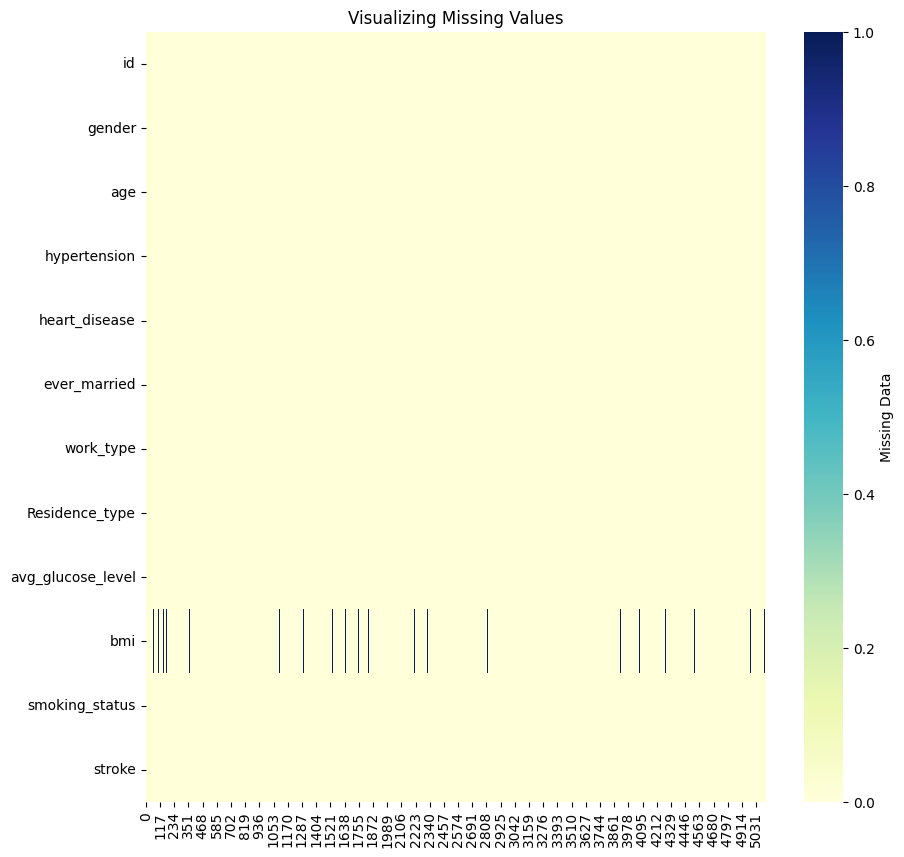

In [10]:
plt.figure(figsize=(10, 10))
plt.title("Visualizing Missing Values")
sns.heatmap(
    df.isna().transpose(),
    cmap="YlGnBu",  # Set a yellow -> green -> blue color gradient
    cbar_kws={"label": "Missing Data"}
)
plt.show()

<li>List your observations here</li>



-   bmi column has null values throughout the column 

### Univariate Analysis

**[Term] Univariate Analysis**

Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable.

#### Categorical Variables

**[Term] Categorical Variable**

In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

For a categorical variable we need to first count the number of data points in each category to analyze the data distribution.

#### gender

In [11]:
## Count each category in the column named "gender"
## Hint: use value_counts()

### START CODE HERE ###
df['gender'].value_counts()
### END CODE HERE ###

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

**Q:** What kind of plot would be the best to visualize value counts?

<Axes: ylabel='gender'>

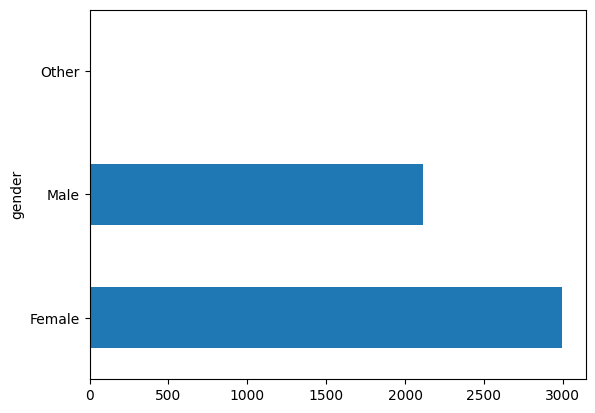

In [12]:
## Visualize the `value_counts()` using the plot you think would be the best
## Hint: pandas provides in-built plotting functions for DataFrames
## * ‘bar’ or ‘barh’ for bar plots
## * ‘hist’ for histogram
## * ‘box’ for boxplot
## * ‘kde’ or ‘density’ for density plots
## * ‘area’ for area plots
## * ‘scatter’ for scatter plots
## * ‘hexbin’ for hexagonal bin plots
## * ‘pie’ for pie plots
## For example `df.plot.pie()` will display a pie chart

### START CODE HERE ###
df['gender'].value_counts().plot.barh()
### END CODE HERE ###

Let's stylize it and put it in a function for ease of use

In [13]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

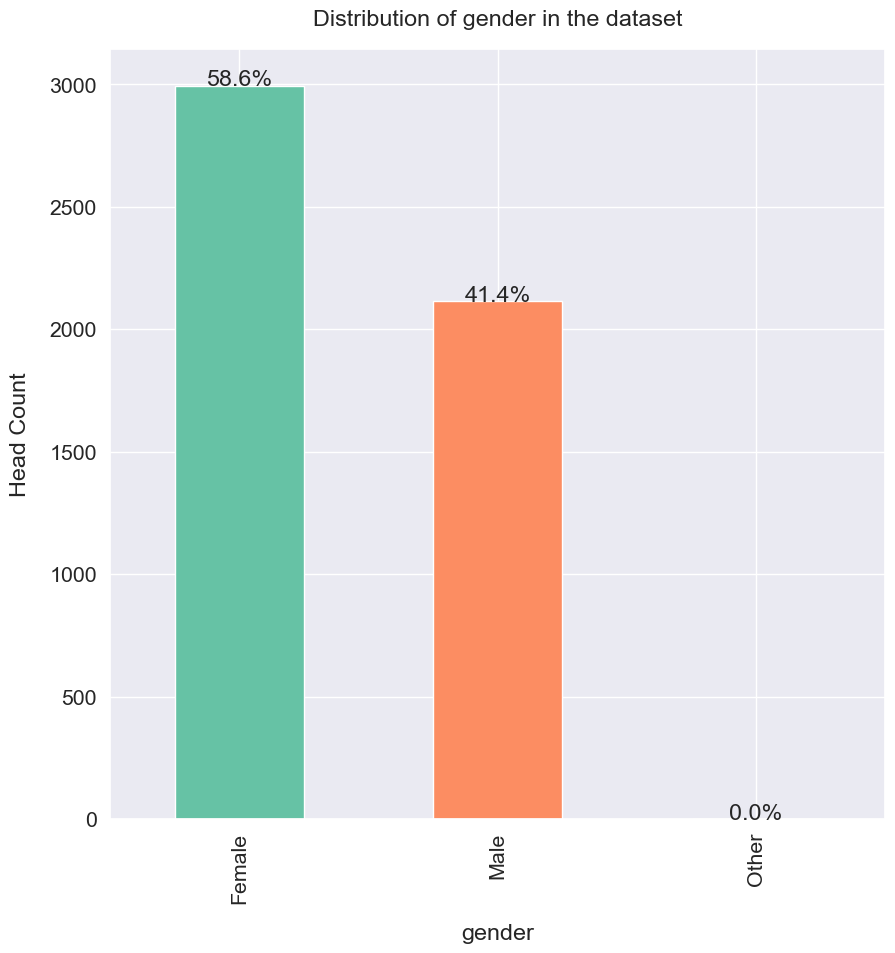

In [14]:
## Display plot for "gender"
## Hint: use univariate_barplot() function

### START CODE HERE ###
univariate_barplot(df,'gender',"Head Count",90)
### END CODE HERE ###

<li>What are your observations on the "gender" column?</li>

In [15]:
## Filter out "Other" from "gender" and reset dataframe index
## Hint: use reset_index() method to reset the index

### START CODE HERE ###
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)
# df['gender'].value_counts()
df.reset_index(inplace=True)
### END CODE HERE ###

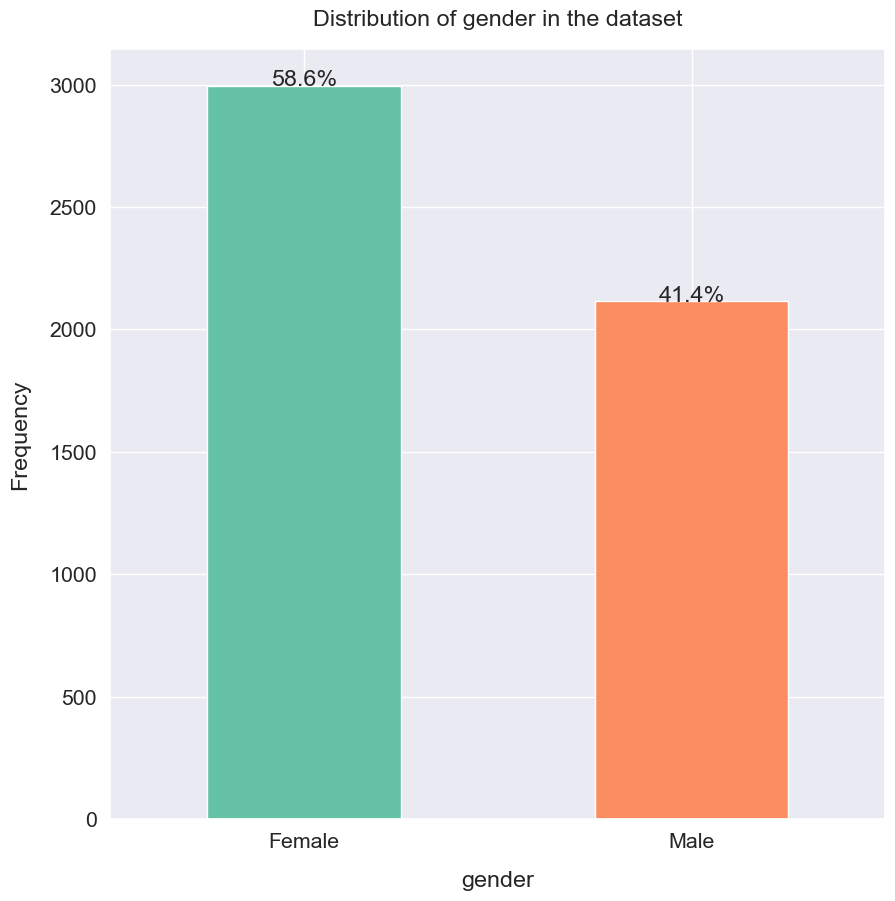

In [16]:
## Display plot for "gender" again to visualize the difference
## Hint: use univariate_barplot() function

### START CODE HERE ###
univariate_barplot(df,'gender')
### END CODE HERE ###

#### ever_married

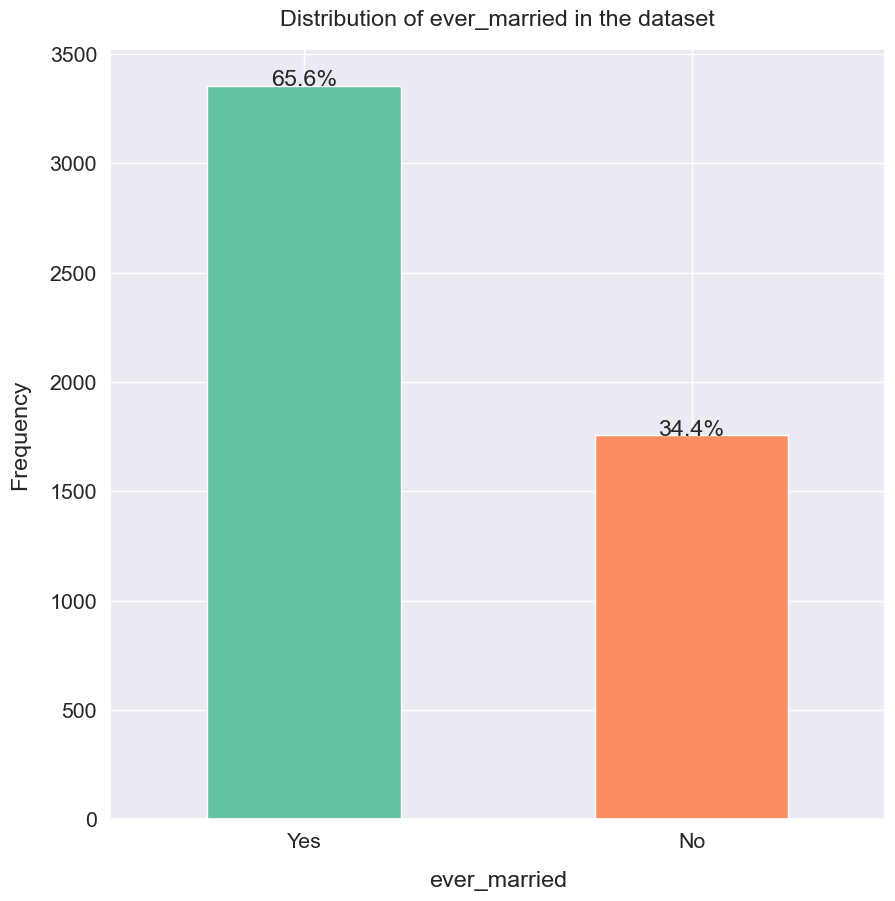

In [17]:
## Display plot for "ever_married"
### START CODE HERE ###
univariate_barplot(df,'ever_married')
### END CODE HERE ###

<li>List your observations for marriage status</li>

-   65.6% of the people (around 3400) are married at least once
-   34.4% of the people have never married

#### Residence_type

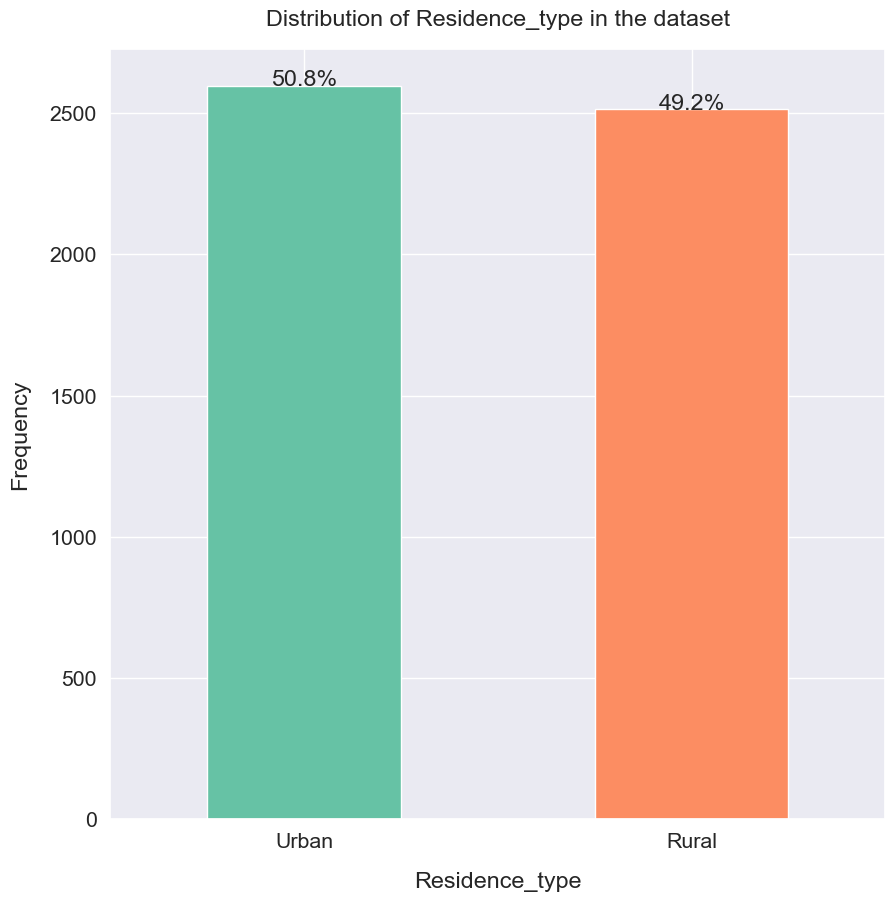

In [18]:
## Display plot for residence_type
### START CODE HERE ###
univariate_barplot(df,'Residence_type')
### END CODE HERE ###

<li>Observations on Residence type here</li>


**<h4>work_type</h4>**

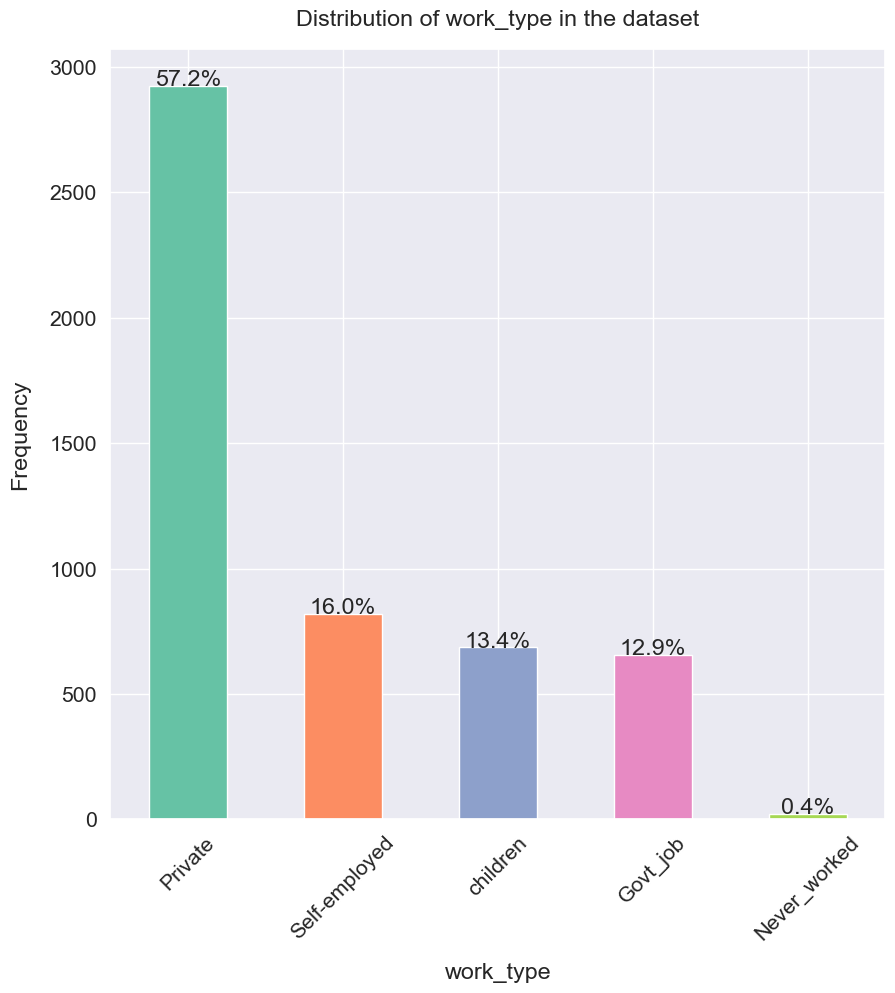

In [19]:
## Display plot for "work_type"
## Hint: use univariate_barplot() function, pass argument xlabel_rotation=45

### START CODE HERE ###
univariate_barplot(df,'work_type',xlabel_rotation=45)
### END CODE HERE ###

<li>Work type observations</li>

In [20]:
df.columns

Index(['index', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

#### smoking_status

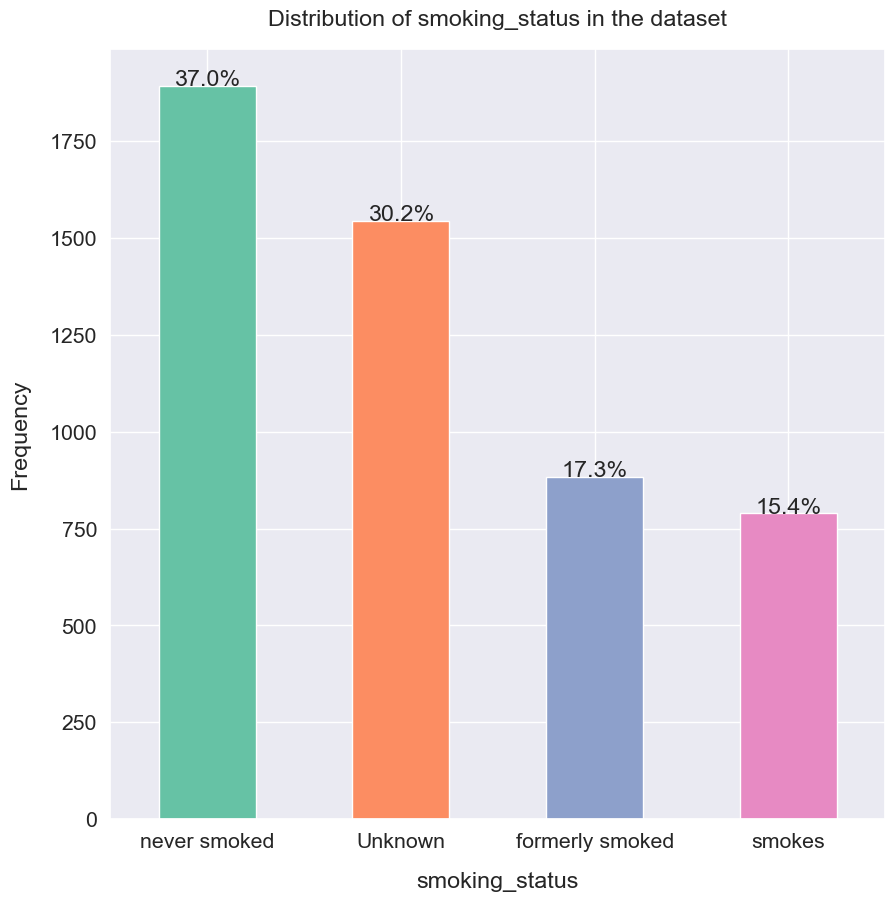

In [21]:
## Display plot for "smoking"

### START CODE HERE ###
univariate_barplot(df,'smoking_status')
### END CODE HERE ###

<li>Smoking status observations</li>


#### Numerical Variables

**[Term] Numerical Variable**

In statistics, A numeric variable (also called quantitative variable) is a quantifiable characteristic whose values are numbers. Numeric variables may be either continuous or discrete.

#### hypertension

We use the `describe()` method of a pandas dataframe to analyze a numeric variable's data distribution

In [22]:
df.hypertension.describe()

count    5109.000000
mean        0.097475
std         0.296633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

As you can see, almost all the values of **hypertension** seems to be either a "0" or a "1". So it is better to treat it as a categorical value rather than a numerical value. Let's perform categorical analysis on **hypertension**.

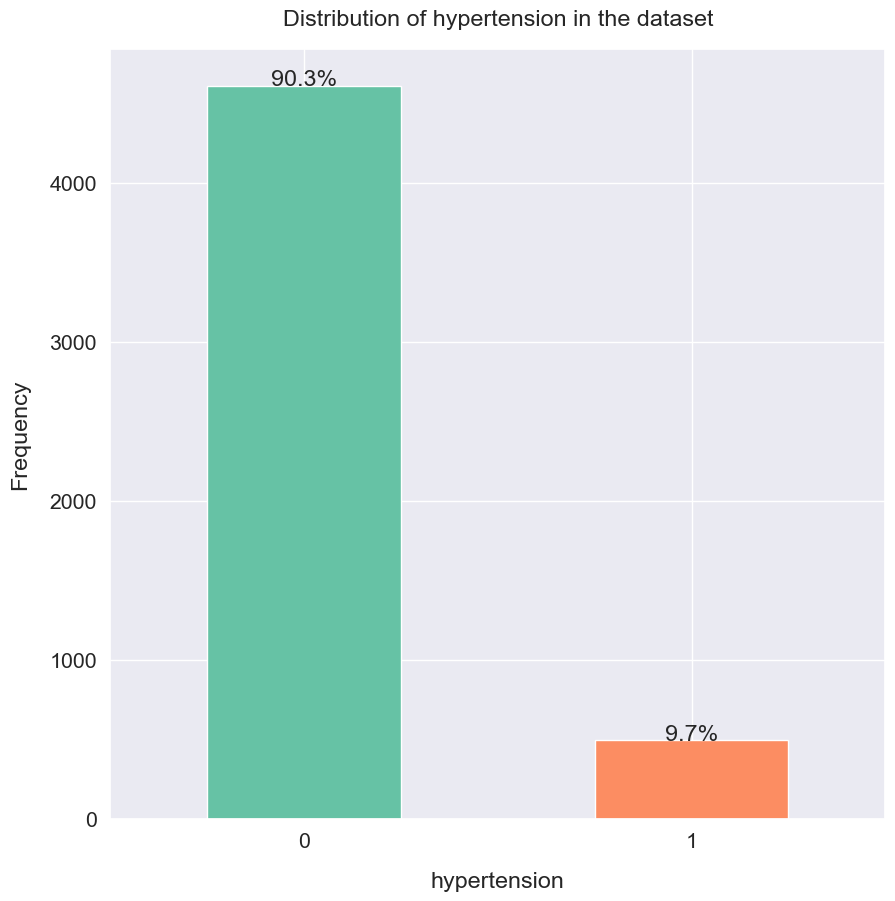

In [23]:
## Display bar plot for "hypertension" field
## Hint: use previous function univariate_barplot()

### START CODE HERE ###
univariate_barplot(df,'hypertension')
### END CODE HERE ###

<li>List your observations here</li>

#### heart_disease

In [24]:
## Use describe() method for heart_disease
### START CODE HERE ###
df['heart_disease'].describe()
### END CODE HERE ###

count    5109.000000
mean        0.054022
std         0.226084
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

In [25]:
df.heart_disease.value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

What did you observe for the **heart_disease** column? How does it compare with the **hypertension** column?

heart_disease column also has either of one values [0 or 1]. Therefore, It can be treated as categorial data.

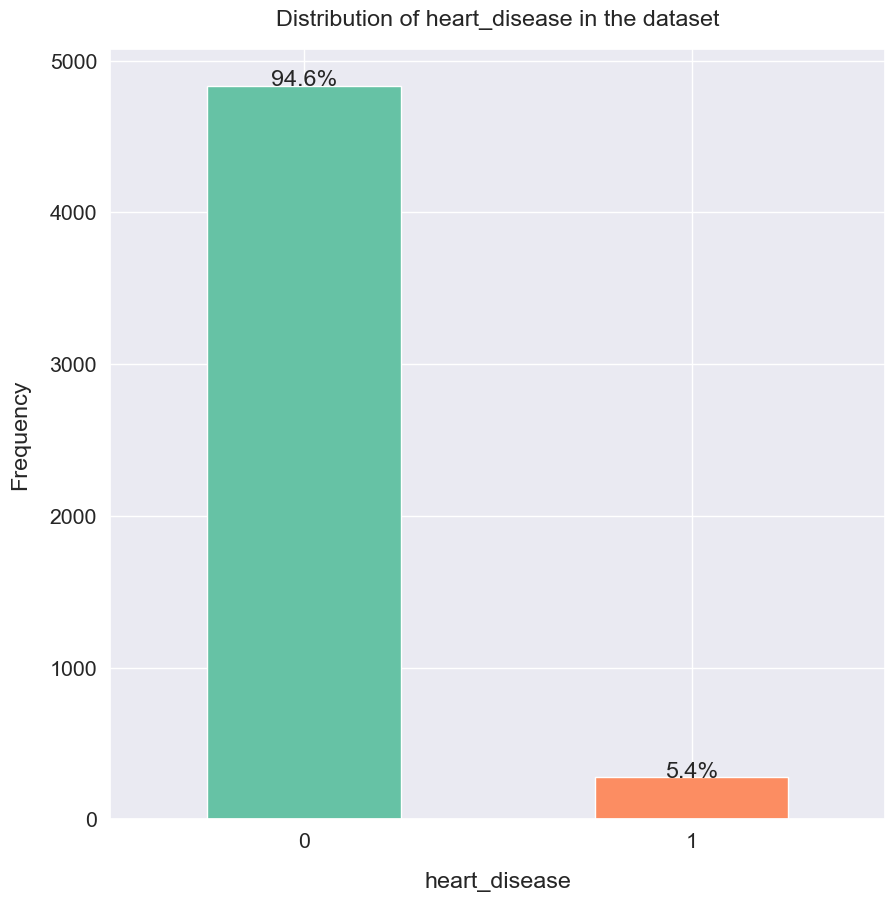

In [26]:
## Display bar plot for "heart_disease" field
## Hint: use previous function univariate_barplot()

### START CODE HERE ###
univariate_barplot(df,'heart_disease')
### END CODE HERE ###

<li>List your observations here</li>

Minority of people have heart disease

In [27]:
df.columns

Index(['index', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

Q: How many categorical features are there in our dataset?

In [28]:
## List all the categorical features that you observed in the data

categorical_features = [
### START CODE HERE ###
  'gender', 'hypertension', 'heart_disease',
  'ever_married', 'work_type', 'Residence_type', 
  'smoking_status','stroke'
### END CODE HERE ###
]

Q: How many numerical features are there in our dataset?

In [29]:
## List all the categorical features that you observed in the data

numerical_features = [
### START CODE HERE ### 
   'age', 'avg_glucose_level', 'bmi'
### END CODE HERE ###
]

#### Bonus Content (Optional)

You can create an interactive plot for the ease of traversing through your plots

In [30]:
from ipywidgets import interact

**[Term] Decorators**

A decorator is a design pattern in Python that allows a user to add new functionality to an existing object without modifying its structure. Decorators are usually called before the definition of a function you want to decorate.

In [31]:
@interact(predictor=categorical_features)
def interactive_univariate_barplot(predictor):
    univariate_barplot(df, predictor)

interactive(children=(Dropdown(description='predictor', options=('gender', 'hypertension', 'heart_disease', 'e…

As mentioned before, we can use the `describe()` method of a pandas dataframe to analyze a numeric variable's data distribution

In [32]:
## Use describe() method to get descriptive stats of numerical features

### START CODE HERE ###
df[numerical_features].describe()
### END CODE HERE ###

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,4908.00000
mean,43.229986,106.140399,28.89456
std,22.613575,45.285004,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.240000,23.50000
50%,45.000000,91.880000,28.10000
75%,61.000000,114.090000,33.10000
max,82.000000,271.740000,97.60000


<li>List your observations here</li>

Other than the data description the best way to visualize a numerical variable is to look at its distribution plot

**[Term] Kernel Density Estimation (KDE)**

KDE is a way to estimate the probability density function of a continuous random variable.

#### age

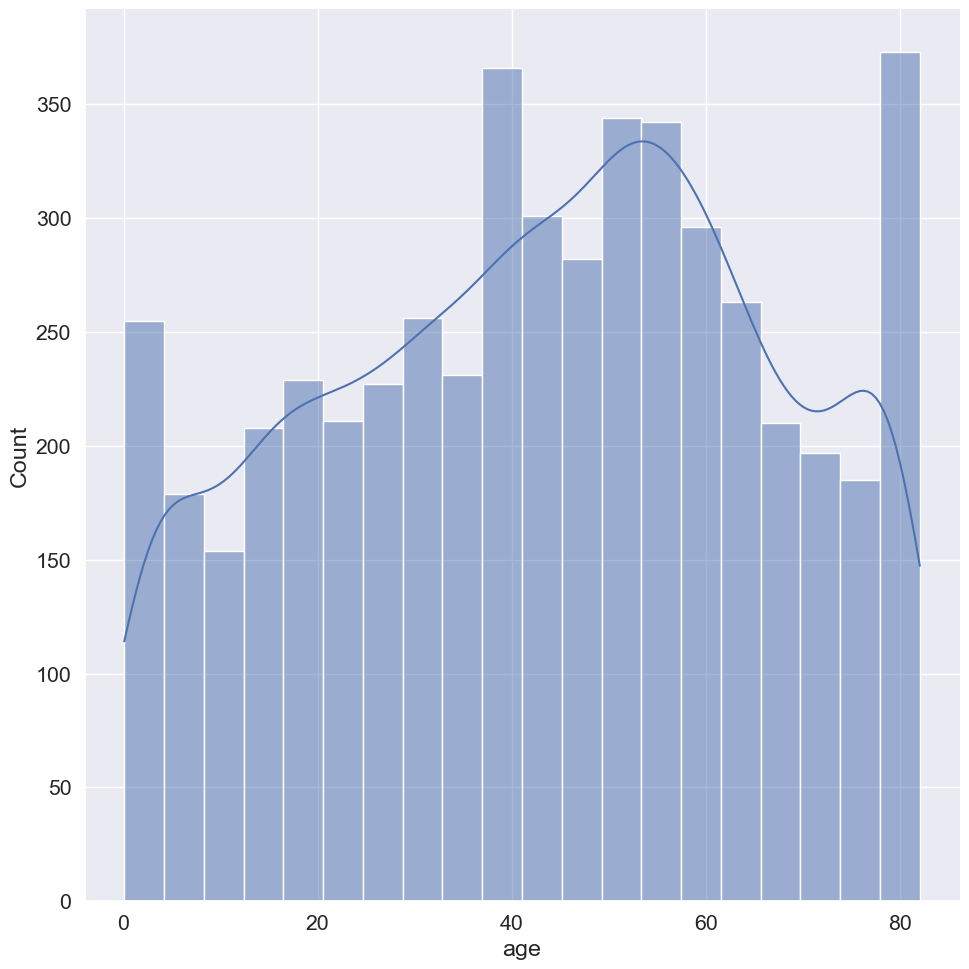

In [33]:
sns.displot(data=df.age, kde=True, height=10)

#### bmi

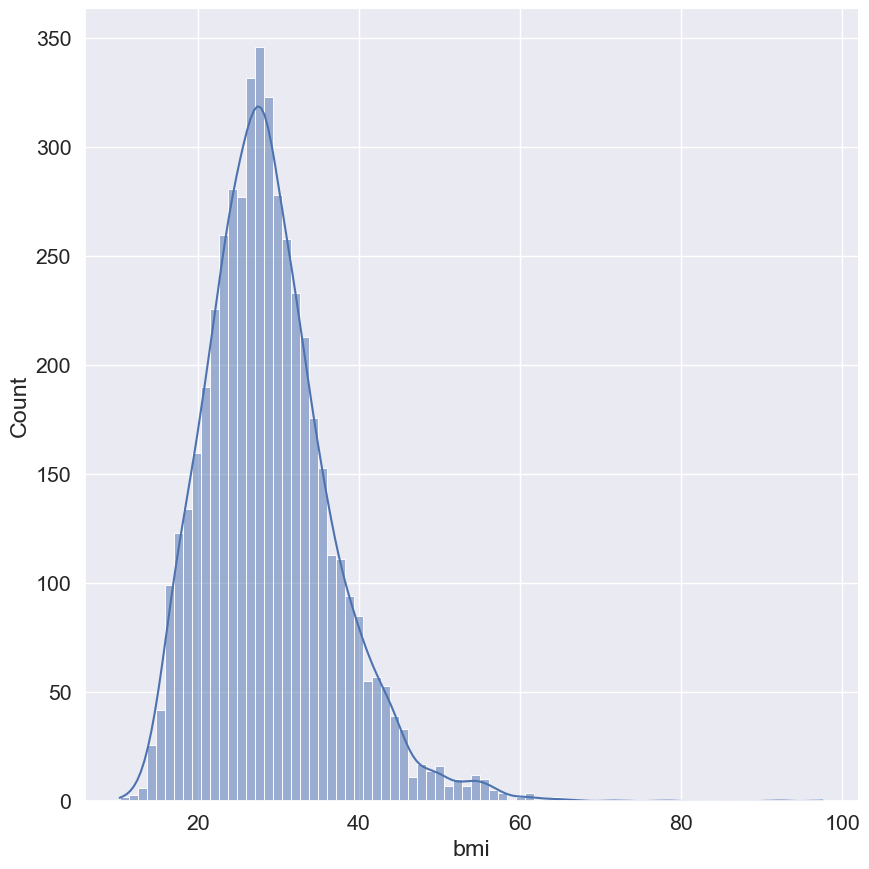

In [34]:
## Display distribution plot for "bmi" field
## Hint: use sns.distplot()

### START CODE HERE ###
sns.displot(df['bmi'],kde=True,height=9)

### END CODE HERE ###

#### avg_glucose_level

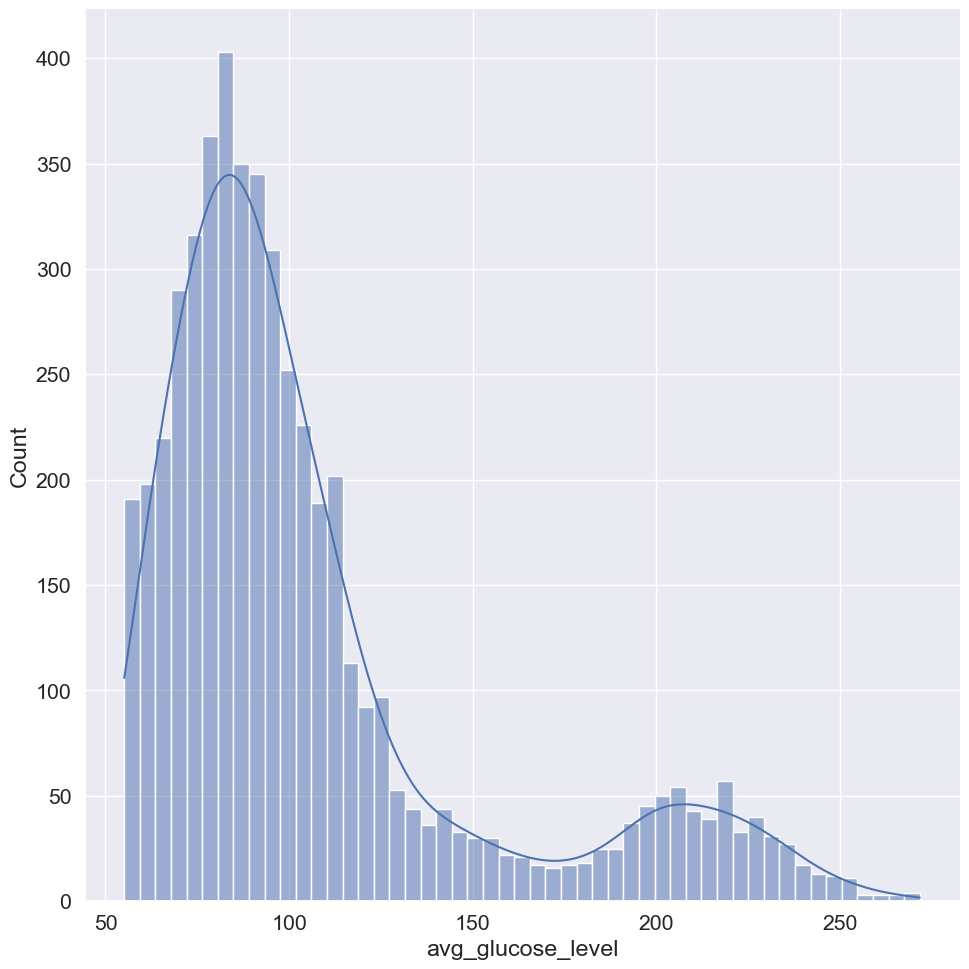

In [35]:
## Display distribution plot for "avg_glucose_level" field
## Hint: use sns.distplot()

### START CODE HERE ###
sns.displot(df['avg_glucose_level'],kde=True,height=10)
### END CODE HERE ###

**[Term] Data Skewness**

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Direction of skew signifies where the "tail" of the distribution lies at.

Look at the mean, median and the plots and list your observations below:

<li>Your observations here</li>

Use the `skew()` method to verify your observation. A negative value signifies a left skew and a positive value signifies a right skew.

In [36]:
df[numerical_features].skew()

age                 -0.137430
avg_glucose_level    1.572815
bmi                  1.055063
dtype: float64

### Target Variable Analysis: stroke

One of the first steps of exploratory data analysis should always be to look at what the values of the label looks like.

In [37]:
target_variable = "stroke"

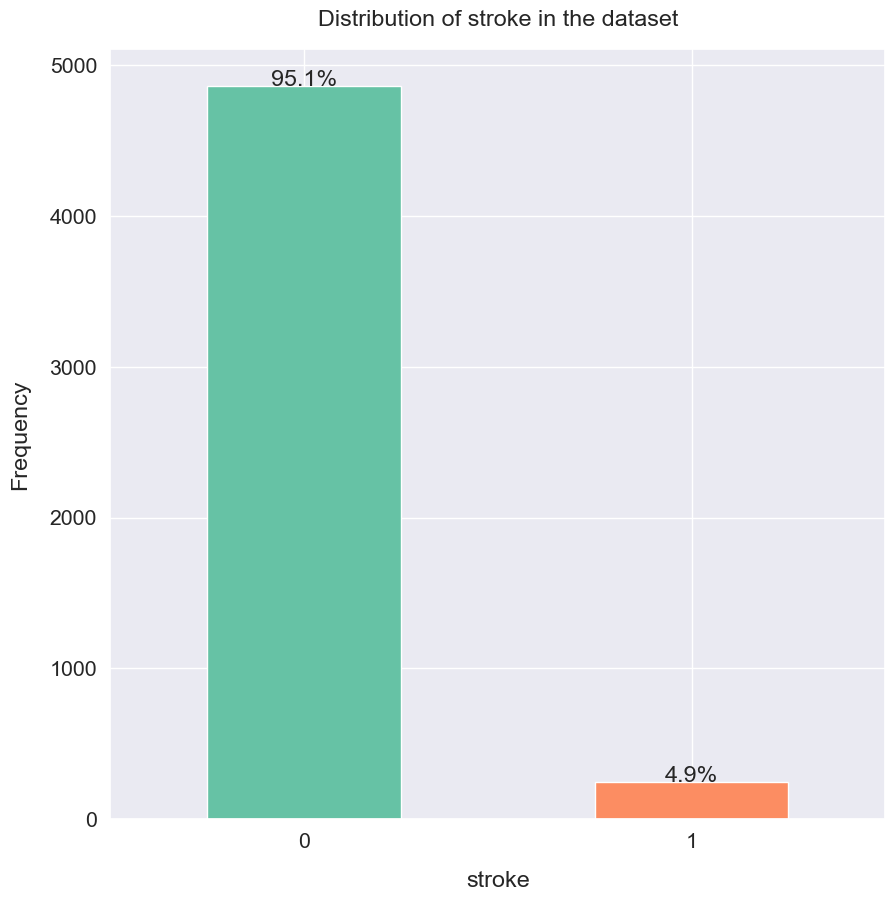

In [38]:
## Display barplot for our target variable
## Hint: use univariate_barplot() function

### START CODE HERE ###
univariate_barplot(df, 'stroke')
### END CODE HERE ###

<li>Your observations here</li>

**[Term] Imbalanced Dataset**

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

We will revisit the problem of an imbalanced dataset later

### Bivariate Analysis

**[Term] Bivariate Analysis**

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

*pandas* provides a `groupby()` function which allows us to group large amounts of data and compute operations on these groups.

Let us first retrace our step back to *work_type* and *smoking_status* and re-analyze them using bivariate analysis. Since they both seem to be associated with age let's compare them with respect to age.

#### work_type vs age

pandas provides an `agg()` method on groupby objects to aggregate using one or more operations over the specified axis.

In [39]:
df.groupby("work_type").agg({"age": "describe"})

age                                                      
                count       mean        std    min    25%   50%   75%   max
work_type                                                                  
Govt_job        657.0  50.879756  15.438879  14.00  40.00  51.0  62.0  82.0
Never_worked     22.0  16.181818   2.342899  13.00  14.25  16.0  17.0  23.0
Private        2924.0  45.510602  18.443826   8.00  30.00  45.0  59.0  82.0
Self-employed   819.0  60.201465  16.835961   7.00  49.00  63.0  75.0  82.0
children        687.0   6.841339   4.533364   0.08   2.00   6.0  11.0  16.0

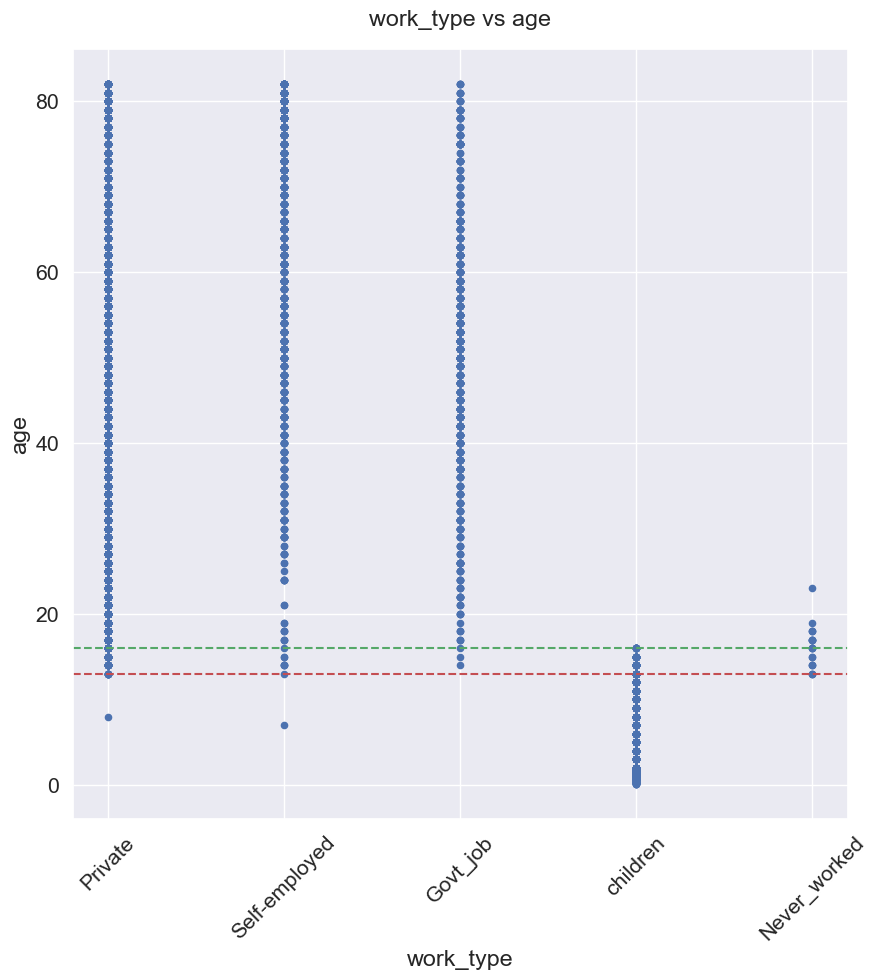

In [40]:
ax = df.plot.scatter(x="work_type", y="age", rot=45, figsize=(10, 10))
ax.set_title("work_type vs age", y=1.02)
ax.axhline(y=13, c="r", linestyle="dashed")
ax.axhline(y=16, c="g", linestyle="dashed")

**<h5>Let's make some assumptions on the data</h5>**

<li><b>Bivariate analysis is done to understand appropriate age group for certain work types</b></li>

<li><b>Since, children are not allowed to work so we can change these values to Never_worked category</b></li>

<li><b>There seems to be some outliers in Private and Self-employed work types</b></li>

<li><b>Let's assume that people below 13 years of age can not be employed for a private job as it is a minimum criteria for many countries</b></li>

<li><b>These days lots of people can be self-employed from YouTube. However, the minimum age limit for youtuber is 13 years. Considering this situation, let's assume that the minimum age limit for being self-employed to be 13 years</b></li>

In [41]:
df.loc[df["work_type"] == "children", "work_type"] = "Never_worked"
df.loc[(df["work_type"] == "Private") & (df["age"] < 13), "age"] = 13
df.loc[(df["work_type"] == "Self-employed") & (df["age"] < 13), "age"] = 13

Let us now look at the updated plots of *work_type*

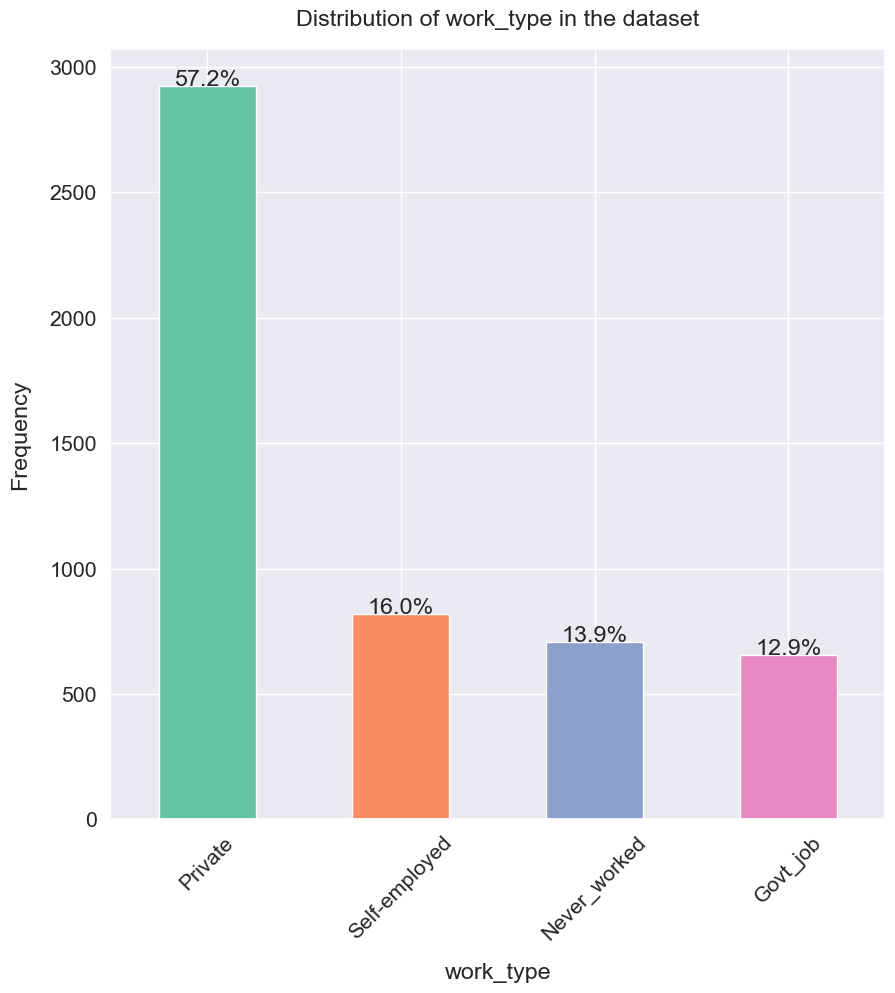

In [42]:
univariate_barplot(df, "work_type", xlabel_rotation=45)

Text(0.5, 1.02, 'work_type vs age')

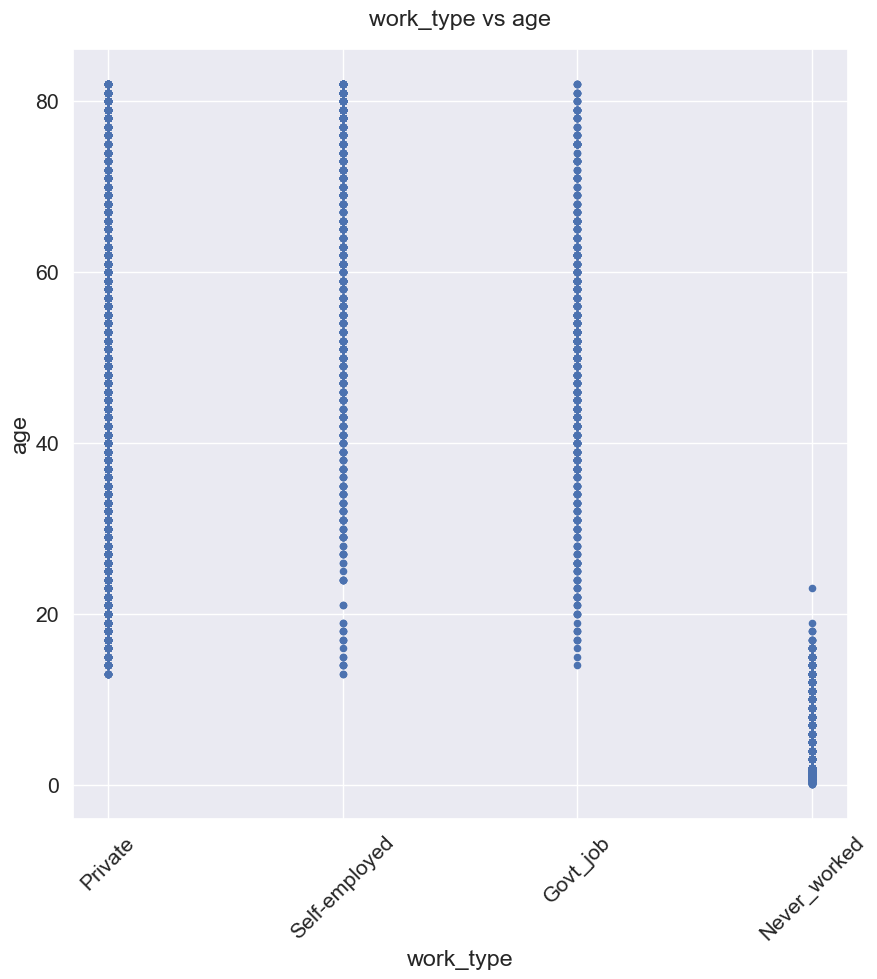

In [43]:
ax = df.plot.scatter(x="work_type", y="age", rot=45, figsize=(10, 10))
ax.set_title("work_type vs age", y=1.02)

We have now reduced the work_type to just 4 categories and handled some of the outliers in the simplest way possible.

#### smoking_status vs age

In [44]:
## Group by 'smoking_status' and aggregate using the `describe` method
## Hint: use groupby() and agg()

### START CODE HERE ###
df.groupby('smoking_status').agg({'age':'describe'})
### END CODE HERE ###

age                                                     
                  count       mean        std    min   25%   50%   75%   max
smoking_status                                                              
Unknown          1544.0  30.237047  25.049863   0.08   8.0  23.0  51.0  82.0
formerly smoked   884.0  54.962670  17.624810  10.00  43.0  57.0  69.0  82.0
never smoked     1892.0  46.744715  19.769584  10.00  31.0  47.0  62.0  82.0
smokes            789.0  47.096324  16.413002  10.00  33.0  47.0  59.0  82.0

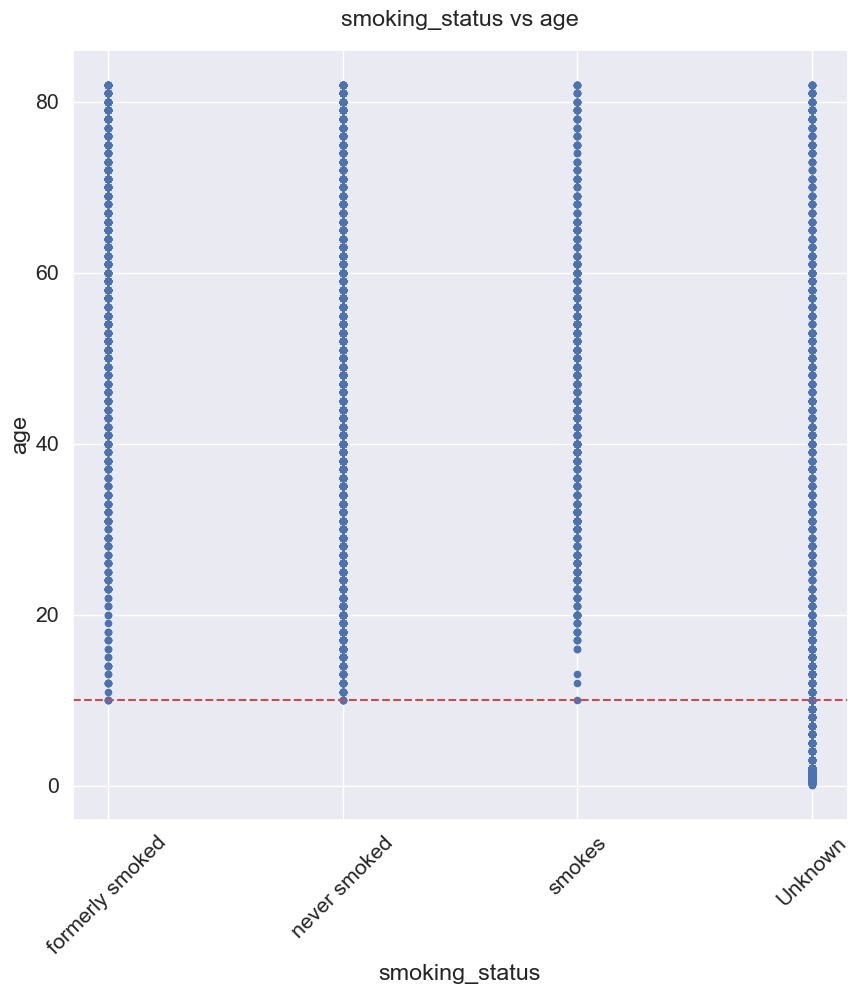

In [46]:
ax = df.plot.scatter(x="smoking_status", y="age", rot=45, figsize=(10, 10))
ax.set_title("smoking_status vs age", y=1.02)
ax.axhline(y=10, c="r", linestyle="dashed")

**<h5>Let's make some more assumptions on the data</h5>**

<li><b>We can clearly see that people below 10 years are not found smoking in this dataset</b></li>

<li><b>Let's make an assumption that person below 10 years can not smoke</b></li>

<li><b>But there are some people whose smoking status is unknown even if they are below that age limit</b></li>

<li><b>People whose smoking status is unknown and below 10 years age limit can thus be changed to never smoked</b></li>

In [45]:
df.loc[(df["smoking_status"] == "Unknown") & (df["age"] < 10), "smoking_status"] = "never smoked"

Let us now look at the updated plot of *smoking_status*

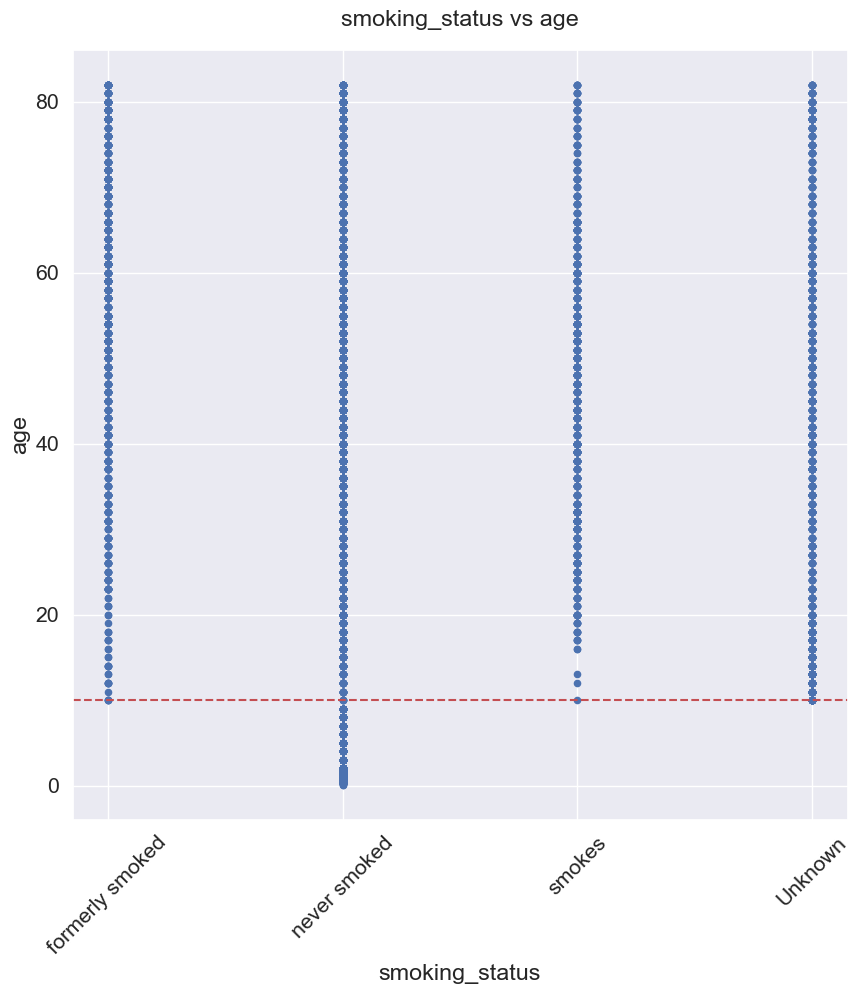

In [49]:
## Display the scatter plot of smoking status vs age the same as was done before
## assumptions were made on the data

### START CODE HERE ###
ax = df.plot.scatter(x="smoking_status", y="age", rot=45, figsize=(10, 10))
ax.set_title("smoking_status vs age", y=1.02)
ax.axhline(y=10, c="r", linestyle="dashed")
### END CODE HERE ###

It's quite hard to make an assumption on the remaining *Unknown* *smoking_staus*. We can convert it to pandas missing value marker (NaN) since they're essentially missing values but let's leave them as it is for now.

**Q:** How can you replace the *Unknown* with a pandas missing value marker (`np.nan`)?

In [54]:
df.loc[(df["smoking_status"] == "Unknown"), "smoking_status"] = np.nan

In [55]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

#### gender vs stroke

Let us now look at the distribution of our target variable within a categorical variable

In [56]:
df.groupby(["gender", "stroke"]).size()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64

In [57]:
df.groupby(["gender", "stroke"]).size().unstack()

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


Let's make a visualization similar to our univariate analysis but with the added information of the target variable distribution.

In [59]:
def bivariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    ax = df.groupby([xlabel, "stroke"]).size().unstack().plot.bar(
        stacked=True,
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    ax.set_title(f"Distribution of {xlabel} with respect to the stroke", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

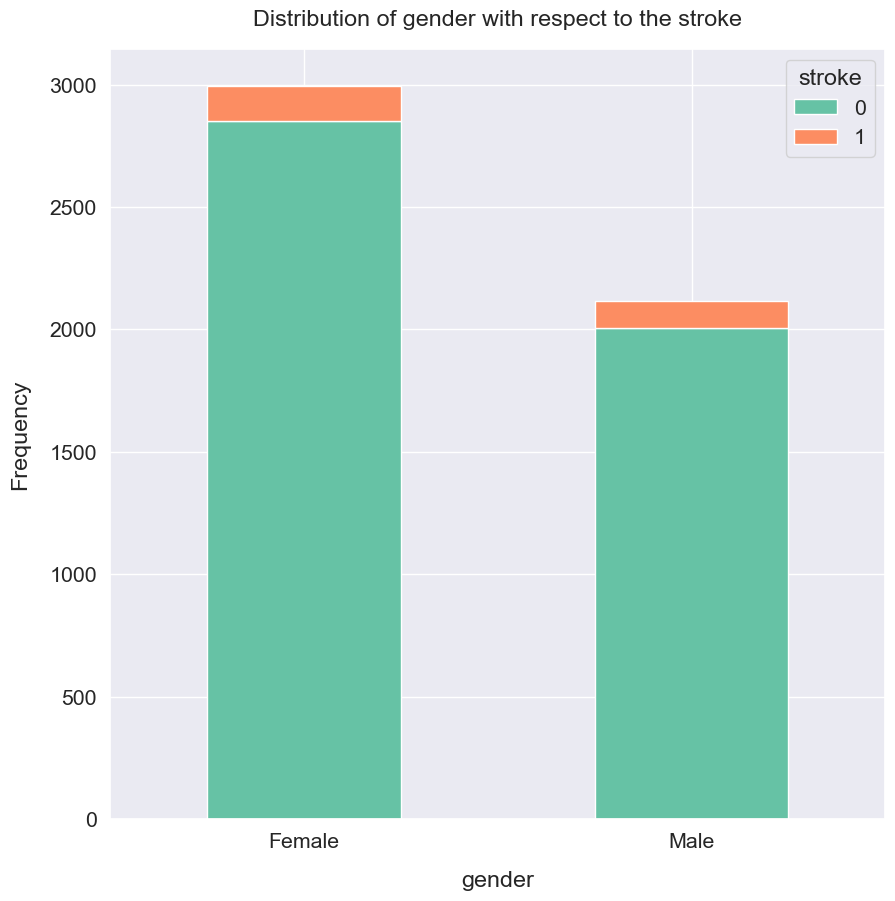

In [60]:
bivariate_barplot(df, "gender")

Let's put this into a different perspective by calculating the percentage probability of each category having a stroke.

* We will first need the data of stroke victims for each category. Since the stroke values are just 0s and 1s, we can easily calculate it if we `groupby()` the category and then add the stroke values.
* To calculate the percent probability we'll need the sample size as well.

In [63]:
feature_impact = df.groupby("gender")["stroke"].agg(["sum", "size"])
feature_impact

,sum,size
gender,,
Female,141,2994
Male,108,2115


In [64]:
feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
feature_impact_probability

gender
Female    4.709419
Male      5.106383
dtype: float64

<li>List your observations here</li>

Let's wrap this up in a function to reuse it in the future

In [65]:
def calculate_feature_impact_probability(data, feature, label="stroke"):
    feature_impact = df.groupby(feature)[label].agg(["sum", "size"])
    feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
    return feature_impact_probability


#### ever_married vs stroke

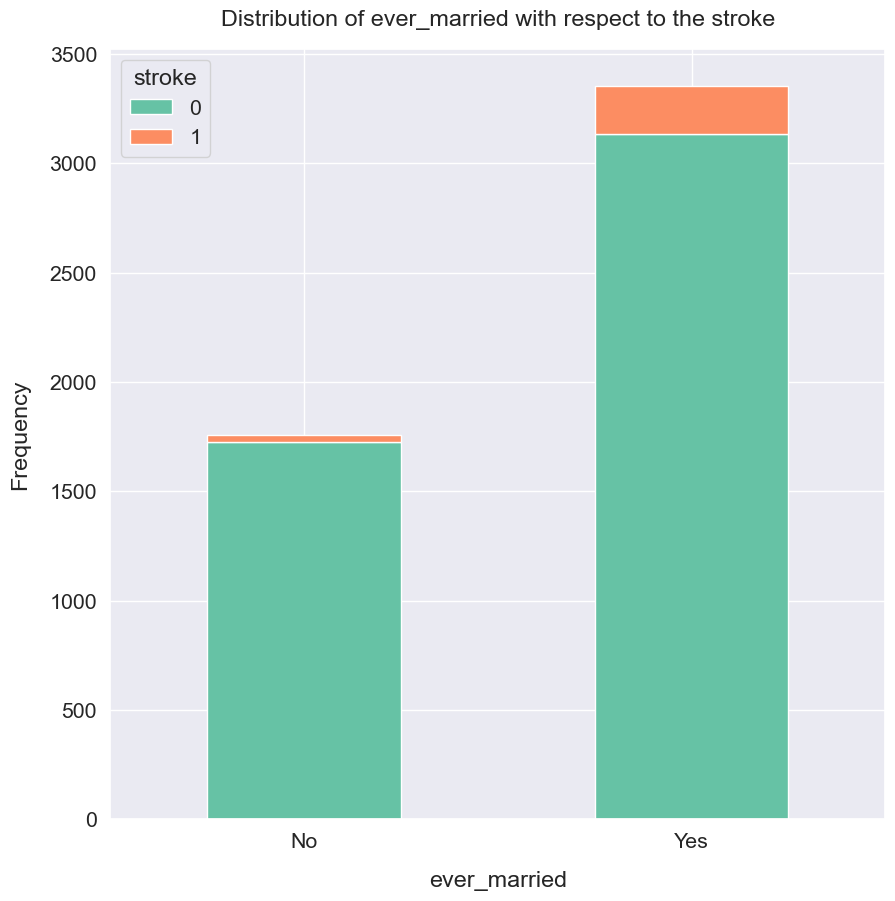

In [66]:
## Display bivariate plot for "ever_married" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###
bivariate_barplot(df,'ever_married')
### END CODE HERE ###

In [1]:
## Calculate the impact of "ever_married" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###
calculate_feature_impact_probability(df,'ever_married')
### END CODE HERE ###

NameError: name 'calculate_feature_impact_probability' is not defined

<li>List your observations here</li>

#### Residence_type vs stroke

In [ ]:
## Display bivariate plot for "Residence_type" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###

### END CODE HERE ###

In [ ]:
## Calculate the impact of "Residence_type" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### work_type vs stroke

In [ ]:
## Display bivariate plot for "work_type" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###

### END CODE HERE ###

In [ ]:
## Calculate the impact of "work_type" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### smoking_status vs stroke

In [ ]:
## Display bivariate plot for "smoking_status" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###

### END CODE HERE ###

In [ ]:
## Calculate the impact of "smoking_status" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### hypertension vs stroke

In [ ]:
## Display bivariate plot for "hypertension" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###

### END CODE HERE ###

In [ ]:
## Calculate the impact of "hypertension" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### heart_disease vs stroke

In [ ]:
## Display bivariate plot for "heart_disease" field
## Hint: use previous function `bivariate_plot()`

### START CODE HERE ###

### END CODE HERE ###

In [ ]:
## Calculate the impact of "heart_disease" on our target variable
## Hint: use previous function `calculate_feature_impact_probability()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### Bonus Content (Optional)

In [ ]:
@interact(predictor=categorical_features)
def interactive_bivariate_barplot(predictor):
    bivariate_barplot(df, predictor)

### Bivariate Analysis: Correlation Matrix and Scatter Plots

**[Term] Correlation Matrix**

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

The relationship between numeric variables can be further analyzed using a correlation matrix and scatter plots as well.

We can use the pandas method `corr()` to generate the correlation matrix

In [ ]:
df[numerical_features].corr()

<li>List your observations here</li>

Let's see the correlation of numerical variables with the target variable

**Q:** What happens when you add a `list` datatype to another `list` datatype?
```python
[1, 2, 3] + [0]
```

In [ ]:
df[numerical_features + [target_variable]].corr()

<li>List your observations here</li>

Let's finally see the scatter plots by defining a reusable function

In [ ]:
def scatter_plot(data, x, y, label="stroke"):
    data.sort_values(label).plot.scatter(
        x=x,
        y=y,
        c=label,
        colormap=sns.color_palette("flare", as_cmap=True),
        figsize=(10, 10),
    )

#### age vs bmi

In [ ]:
scatter_plot(data=df, x="age", y="bmi")

<li>List your observations here</li>

#### age vs avg_glucose_level

In [ ]:
## display the scatter plot of "age" vs "avg_glucose_level" on our target variable
## Hint: use previous function `scatter_plot()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

#### bmi vs avg_glucose_level

In [ ]:
## display the scatter plot of "avg_glucose_level" vs "bmi" on our target variable
## Hint: use previous function `scatter_plot()`

### START CODE HERE ###

### END CODE HERE ###

<li>List your observations here</li>

# Data Preparation and Feature Engineering

### Categorical Encoding

**[Term] Categorical Encoding**

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

There are two most widely used encoding techniques:
1. Label Encoding
2. One-Hot Encoding

**[Term] Label Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [ ]:
df.gender.value_counts()

In [ ]:
df.gender.astype("category").cat.codes.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def fit_label_encoder(feature):
    le = LabelEncoder()
    le.fit(feature)
    return le

**[Term] One-Hot Encoding**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. **One-Hot Encoding is the process of creating dummy variables.**

In [ ]:
pd.get_dummies(df.work_type)

### Choosing the correct encoder

It's good to use a label encoder when the variables have a numeric association with each other, for example, grades and ranks.

We can use one-hot encoding for unassociated categorical variables.

However, One-Hot Encoding results in a *Dummy Variable Trap* as the outcome of one variable can easily be predicted with the help of the remaining variables. Dummy Variable Trap is a scenario in which variables are highly correlated to each other. In order to overcome this problem, one of the dummy variables has to be dropped.

So, a One-Hot Encoding system of two variables is basically just a Label Encoding system.

In [ ]:
def one_hot_encoder(data, feature_name, column_to_drop=None):
    modified_data = data.copy()
    feature = modified_data[feature_name]

    if column_to_drop is None or column_to_drop not in feature.unique():
        # Drop the column with least number of data points
        column_to_drop = feature.value_counts().index[-1]

    dummies = pd.get_dummies(feature)
    modified_data[dummies.columns] = dummies

    return modified_data.drop([column_to_drop, feature_name], axis=1)

In [ ]:
feature_columns = categorical_features + numerical_features
features = df[feature_columns].copy()

gender_encoder = fit_label_encoder(feature=features.gender)
features["gender"] = gender_encoder.transform(features["gender"])

marital_status_encoder = fit_label_encoder(feature=features.ever_married)
features["ever_married"] = marital_status_encoder.transform(features["ever_married"])

residence_encoder = fit_label_encoder(feature=features.Residence_type)
features["Residence_type"] = residence_encoder.transform(features["Residence_type"])

features = one_hot_encoder(features, "work_type", column_to_drop="Never_worked")
features = one_hot_encoder(features, "smoking_status", column_to_drop="Unknown")
features.head()

### Data Imputation

**[Term] Data Imputation**

In statistics, imputation is the process of replacing missing data with substituted values.

There are many ways to handle missing data

1. Drop data

    a. Drop the entire row
      - The whole row can be dropped
        - if the target variable that we are trying to predict is missing
        - if majority of data item in a row is missing

    b. Drop the whole column
      - Whole columns can be dropped if most entries in the column are empty

2. Replace data

    a. Replace it by mean
      - Replace the missing value in a column with the mean
      - Only works on column level
      - Mean imputation can't be used on categorical features i.e. only works with continuous feautres
      - Problem may occur when there is outliers in the dataset as outlier value may influence more in computing the mean

    b. Replace it by median
      - Replace the missing value in a column with the median
      - Only works on column level
      - Median imputation can't be use on categorical features i.e. only works with continuous features
      - Better imputation strategy compared to the mean in the presence of outliers in the dataset

    c. Replace it by mode (frequency)
      - Replace the missing value in a column with the mode (i.e. maximum occuring item in a column)
      - Only works on column level
      - Mode imputation is suitable for categorical features and is not suitable for continuous or discrete numerical features

    d. Replace it based on other functions


In our case, the *bmi* column contains 201 missing data i.e. around 4%, so it is not suitable to drop the whole *bmi* column. Instead we need to impute the missing data with the best replacement strategy.

We will use `KNNImputer` from Sklearn to imput a missing values in bmi column. Under the hood it's also a replace by mean strategy.

#### KNNImputer
  - Here, each sample's missing values are imputed using the mean value from `n_neighbours` nearest neighbors found in the training set.
  - Two samples are close (neighbors) if the features that neither is missing are close.
  - Closeness is computed using euclidean distance.

Inorder to use KNNImputer to fill missing values, all of our dataframe values should be in numerical form, since we will compute euclidean distance to find neighbors to missing data point. So, we will be using the encoded features instead of the original data.

In [ ]:
from sklearn.impute import KNNImputer


imputter = KNNImputer(n_neighbors=30)
imputted_data = imputter.fit_transform(features)
imputted_data

This is just a numpy array so we need to convert it back to a DataFrame

**Q:** How do you display the summary information of a DataFrame?

In [ ]:
features = pd.DataFrame(data=imputted_data, columns=features.columns)
features.info()

Put the imputed data into the original dataset

In [ ]:
df["bmi"] = features["bmi"]

### Outlier Detection

Boxplots are the best way to detect outliers in a numerical variable

#### age

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.age)

<li>There is no presence of outlier in Age column.</li>

**[Term] Interquartile Range (IQR)**

In descriptive statistics, the interquartile range is a measure of statistical dispersion, which is the spread of the data. It is defined as the difference between the 75th and 25th percentiles of the data.

**[Term] IQR Filter**

This technique uses the IQR to remove or impute outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) is an outlier, and can be removed or imputed.

Let's write a function to get the interquartile range

In [ ]:
def get_iqr(feature):
    quantile1, quantile3 = np.percentile(feature, [25, 75])
    iqr_value = quantile3 - quantile1
    lower_bound = quantile1 - 1.5 * iqr_value
    upper_bound = quantile3 + 1.5 * iqr_value
    return lower_bound, upper_bound

#### bmi

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.bmi)

<li>From the given boxplot, we can see that there are many values that is beyond the 3 standard deviation.</li>

<li>Since, the bmi column is not gaussian distributed, we have to use inter quantile range for detecting the outliers</li>

<li>It is not always that outliers are not important for predictive modelling.</li>

<li>In predicting minority class in a class imbalance problem, outliers can play an important role for our model.</li>

<li>Since, we also have class imbalance problem in our dataset, we donot remove the outliers.</li>

<li>Instead of removing it, we have to deal with it smartly.</li>

<li>So we are replacing the extreme outlier values with the mean of values that are deviated from the inter quantile range.</li>

In [ ]:
lower, upper = get_iqr(features.bmi)
outlier_condition = (features.bmi < lower) | (features.bmi > upper)
features[outlier_condition] = features[outlier_condition].mean()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.bmi)

#### avg_glucose_level

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.avg_glucose_level)

<li>We can see a similar outlier trend in the <i>avg_glucose_level</i></li>

In [ ]:
lower, upper = get_iqr(features.avg_glucose_level)
outlier_condition = (features.avg_glucose_level < lower) | (features.avg_glucose_level > upper)
features[outlier_condition] = features[outlier_condition].mean()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.avg_glucose_level)

### Feature Selection

Let us now prepare training and test data.

Training data and test data sets are two different but important parts in machine learning. While training data is necessary to teach an ML algorithm, testing data, as the name suggests, helps you to validate the progress of the algorithm's training and adjust or optimize it for improved results.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[categorical_features + numerical_features].copy()
y = df[target_variable].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # To distribute each class in the train and test set evenly
    stratify=y,
    # Take a test size of 20%
    test_size=0.2,
    # Set a seed so that we can reproduce the result
    random_state=42,
)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

Let's check whether stratified split worked or not. To do that, we can check the percentage of data of each class in the train and test labels.

In [ ]:
y_train_counts = y_train.value_counts()
y_train_counts / y_train_counts.sum() * 100

In [ ]:
y_test_counts = y_test.value_counts()
y_test_counts / y_test_counts.sum() * 100

We can see that we have similar amount of data for each class in the train and test set

Now, let's generate the features for both train and test datasets

In [ ]:
gender_encoder = fit_label_encoder(X_train["gender"])
X_train["gender"] = gender_encoder.transform(X_train["gender"])
X_test["gender"] = gender_encoder.transform(X_test["gender"])

marital_status_encoder = fit_label_encoder(X_train["ever_married"])
X_train["ever_married"] = marital_status_encoder.transform(X_train["ever_married"])
X_test["ever_married"] = marital_status_encoder.transform(X_test["ever_married"])


residence_location_encoder = fit_label_encoder(X_train["Residence_type"])
X_train["Residence_type"] = residence_location_encoder.transform(X_train["Residence_type"])
X_test["Residence_type"] = residence_location_encoder.transform(X_test["Residence_type"])

X_train = one_hot_encoder(X_train, "work_type", column_to_drop="Never_worked")
X_test = one_hot_encoder(X_test, "work_type", column_to_drop="Never_worked")

X_train = one_hot_encoder(X_train, "smoking_status", column_to_drop="Unknown")
X_test = one_hot_encoder(X_test, "smoking_status", column_to_drop="Unknown")


### Feature Normalization

Given different input features with varying scales, feature normalization and standardization are used to guarantee that some machine learning models can work and also help to improve the model's training speed and performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

X_train[numerical_features] = scale.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scale.transform(X_test[numerical_features])

# Model Training

## **Logistic Regression**




*TL:DR: Logistic regression is a classification machine learning algorithm(supervised) used in binary or multi-class classification. It tries to estimate the class of input features using S-shaped sigmoid function/curve which indicates the likelihood of something. The value from sigmoid function always ranges [0,1] (probablistic value)*




* Logistic regression is one of the most popular classification Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.



* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

<img src= "https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png" />


The curve from the logistic function indicates the likelihood of something such as whether the patient will have heart stroke or not.


**Note: Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.**


### **Logistic Function (Sigmoid Function):**

$$h(x) = g(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$



* The sigmoid function is a mathematical function used to map the predicted values to probabilities. It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.


* In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.


### **How to use Logistic Regression**

Use Scikit-learn machine learning library to train the Logistic regression model.

```python
from sklearn.linear_model import LogisticRegression
```

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

### What is random_state?

**random_state** is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced.

## Classical Programming Vs Machine Learning
<img src="https://miro.medium.com/max/799/1*t6Myx_4eEwaWP9Vms_kYfg.png"/>

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train) # pass training data and training answer to model

# **Model Evaluation**

We developed the Machine learning model. Is it an accurate model?

The evaluation metric depends on the machine learning algorithm. Since we have used Logistic regression. The evaluation metric would be to measure the accuracy of classification. Other metrics also exist like f1-scores, ROC, AUC, etc. for classification problems.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, f1_score

In [ ]:
# predict for the test data
y_pred = clf.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.3f}%")

In [ ]:
print(f"Accuracy: {f1_score(y_test, y_pred) * 100:.3f}%")

The accuracy looks good. Lets see the matrix of classification/ Confusion matrix.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_, cmap=plt.cm.Blues)

### Sometimes accuracy is not a good metric

Let's see the count distribution and percentage of the target variable to see how many data points are there for different class.

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts(normalize=True)

Class 1 has low no. of data points.

If we just write

```python
print("0")
```
for every Input we will get 95% accuracy.Therefore, for an imbalanced dataset, accuracy is not a good metric.


## Anatomy of confusion matrix


<img src= "https://miro.medium.com/max/1400/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="600" height="300"/>


In confusion matrix, the rows corresponds to what machine learning model predicts and the columns correspond to actual values. Now lets understand the terms TP, FP,TN,FN.


**True Positive:**

Interpretation: You predicted that a person is diabetic and he/she actually is.

**True Negative:**

Interpretation: You predicted that a person is not diabetic and he/she actually is not.

**False Positive: (Type 1 Error)**

Interpretation: You predicted that a person is diabetic and he/she actually is not.

**False Negative: (Type 2 Error):**

Interpretation: You predicted that a person is not diabetic and he/she actually is.

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Not Stroke", "Stroke"], cmap=plt.cm.Blues)
plt.show()

Other evaluation metrics:


<img src="https://miro.medium.com/max/1068/1*EXa-_699fntpUoRjZeqAFQ.jpeg"/>

For simplicity check F1-score of the model.

In [ ]:
f1_score(y_test, y_pred) *100

Model is not leanring anything.

### Why is the model not learning anything?

Since, the target class "1" is only 5% of the whole dataset. So, we are facing this issue.
Let's do oversampling of underrepresented class on our training set to handle class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.info()

In [ ]:
X_train_upsampled.info()

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
clf = LogisticRegression(random_state=0)
clf.fit(X_train_upsampled, y_train_upsampled) # pass training data and training answer to model
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_, cmap=plt.cm.Blues)
plt.show()

It seems like model is learning.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(
    " Accuracy: {:.3f}%      F1-Score: {:.5f}"\
    .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred) * 100)
)

In [ ]:
#@title Optional [Other Smote Technique]
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)


classifier_border = LogisticRegression(random_state = 40)
classifier_border.fit(X_oversample_borderline, y_oversample_borderline)


y_pred = classifier_border.predict(X_test)
print(
    " Accuracy: {:.3f}%      F1-Score: {:.5f}"\
    .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred) * 100)
)

#### [Term] Hyperparameter Tuning



[Example](https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning)

# What's Next?

<img src = "https://i.pinimg.com/originals/02/81/f9/0281f9d2d8b8c9f2801843a1f7445977.png"/>

# What are some other popular classification algorithms?

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png"/>

* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Support Vector Machines/SVC
* Naive Bayes

# Resources

* Implementation of Machine Learning Algorithm from Scratch: [Link](https://github.com/ghimiresunil/Implementation-of-Machine-Learning-Algorithm-from-Scratch)